This notebook loads in all of the efk logs and sorts them by the variance in all variables. This is to sort them by those that move/turn the most, and at varying speeds.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('converted-data/50/50-XKF1.csv')
df['timestamp'] = df['timestamp'].apply(datetime.datetime.fromtimestamp)
df

,timestamp,TimeUS,C,Roll,Pitch,Yaw,VN,VE,VD,dPD,PN,PE,PD,GX,GY,GZ,OH
0,2023-03-15 17:45:59.979261,98400487,2,1.35,0.02,335.91,-0.052085,-0.024868,0.033291,0.037168,1.318903,0.852745,-1.447177,-0.16,0.08,0.08,275.49
1,2023-03-15 17:46:00.079203,98500429,2,1.35,0.02,335.90,-0.050998,-0.024312,0.033737,0.024231,1.318211,0.853966,-1.444788,-0.16,0.09,0.08,275.49
2,2023-03-15 17:46:00.179173,98600399,2,1.35,0.02,335.89,-0.052945,-0.024433,0.034183,0.016415,1.316829,0.854771,-1.442868,-0.16,0.09,0.08,275.49
3,2023-03-15 17:46:00.279177,98700403,2,1.36,0.02,335.89,-0.051185,-0.022025,0.036195,0.029725,1.316527,0.856551,-1.439319,-0.16,0.09,0.08,275.49
4,2023-03-15 17:46:00.379174,98800400,2,1.35,0.02,335.88,-0.049371,-0.022415,0.037914,0.043385,1.315840,0.857887,-1.435133,-0.16,0.09,0.08,275.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,2023-03-15 17:49:47.079171,325500397,2,1.09,0.28,336.72,-0.067856,0.048336,0.118996,-0.023718,1.773816,1.355460,-2.040880,-0.36,0.17,0.79,275.49
1722,2023-03-15 17:49:47.179172,325600398,2,1.14,0.31,336.61,-0.046814,0.052963,0.118642,-0.024179,1.771033,1.353123,-2.042813,-0.36,0.17,0.79,275.49
1723,2023-03-15 17:49:47.279168,325700394,2,1.06,0.25,336.56,-0.039256,0.043484,0.117829,-0.053913,1.770352,1.350133,-2.048429,-0.36,0.17,0.79,275.49
1724,2023-03-15 17:49:47.379196,325800422,2,1.21,0.18,336.58,-0.058070,0.041355,0.117712,-0.049036,1.767141,1.347956,-2.051607,-0.36,0.17,0.79,275.49


In [3]:
from glob import glob
import os
import sys
get_log_id = lambda x: os.path.basename(os.path.dirname(x))
ekf_logs = glob('converted-data/**/*XKF1.csv')

dfs = []
for log_path in ekf_logs:
    df = pd.read_csv(log_path)
    df['timestamp'] = df['timestamp'].apply(datetime.datetime.fromtimestamp)
    df['log_id'] = get_log_id(log_path)
    dfs.append(df)

df = pd.concat(dfs)
df['log_id'] = df['log_id'].astype('int')

df['dis_xy'] = np.sqrt(
    df['PN']**2 + df['PE']**2
)
df['time_diff'] = df['timestamp'].diff()

df

,timestamp,TimeUS,C,Roll,Pitch,Yaw,VN,VE,VD,dPD,PN,PE,PD,GX,GY,GZ,OH,log_id,dis_xy,time_diff
0,1969-12-31 19:00:35.672197,35672197,2,-0.13,0.55,87.20,0.022615,-0.017658,0.076123,-0.760086,0.000000,0.000000,0.707091,0.00,0.00,-0.08,0.00,61,0.000000,NaT
1,1969-12-31 19:00:35.772185,35772185,2,-0.13,0.55,87.18,0.023230,-0.019495,0.076741,-2.677350,0.000000,0.000000,0.471782,0.00,0.00,-0.07,0.00,61,0.000000,0 days 00:00:00.099988
2,1969-12-31 19:00:35.872200,35872200,2,-0.13,0.55,87.17,0.024462,-0.015767,0.076978,-2.279402,0.000000,0.000000,0.312651,0.00,0.00,-0.07,0.00,61,0.000000,0 days 00:00:00.100015
3,1969-12-31 19:00:35.972251,35972251,2,-0.13,0.54,87.18,0.025225,-0.017464,0.077508,-1.352814,0.000000,0.000000,0.206151,0.00,0.00,-0.08,0.00,61,0.000000,0 days 00:00:00.100051
4,1969-12-31 19:00:36.072238,36072238,2,-0.13,0.56,87.18,0.026570,-0.018432,0.078816,-0.668829,0.000000,0.000000,0.136572,0.00,0.00,-0.08,0.00,61,0.000000,0 days 00:00:00.099987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2022-10-24 19:51:04.079002,337973384,1,0.14,-0.48,352.10,0.253019,0.074363,-0.003225,-0.001347,22.172073,-8.069010,-0.280622,0.18,0.05,0.14,220.73,25,23.594698,0 days 00:00:00.040028
2295,2022-10-24 19:51:04.119012,338013394,1,0.17,-0.47,352.13,0.249981,0.072898,-0.003611,-0.000013,22.178993,-8.063541,-0.280130,0.18,0.05,0.14,220.73,25,23.599331,0 days 00:00:00.040010
2296,2022-10-24 19:51:04.158989,338053371,1,0.17,-0.48,352.15,0.248180,0.067886,-0.004368,0.011625,22.186096,-8.058699,-0.278860,0.18,0.05,0.14,220.73,25,23.604353,0 days 00:00:00.039977
2297,2022-10-24 19:51:04.179007,338073389,1,0.16,-0.48,352.15,0.248121,0.068281,-0.003300,0.019041,22.189123,-8.056257,-0.278070,0.18,0.05,0.14,220.73,25,23.606365,0 days 00:00:00.020018


In [4]:
df['timestamp'].apply(lambda x: type(x)).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [5]:
by_id = df.groupby('log_id')
log_std = by_id.std() # by_id.max() - by_id.min()
to_drop = ['TimeUS', 'C']
log_std = log_std.drop(to_drop, axis=1)
log_std.columns = [f'STD({col})' for col in log_std.columns]
# log_ranges.set_index('log_id', inplace=True)

log_std.describe().round(1)

,STD(timestamp),STD(Roll),STD(Pitch),STD(Yaw),STD(VN),STD(VE),STD(VD),STD(dPD),STD(PN),STD(PE),STD(PD),STD(GX),STD(GY),STD(GZ),STD(OH),STD(dis_xy),STD(time_diff)
count,102,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102
mean,0 days 00:01:27.705961691,1.0,0.9,39.6,0.3,0.3,0.1,0.2,2.4,1.8,0.8,0.0,0.0,0.1,7.2,2.6,230 days 23:27:55.512661912
std,0 days 00:02:10.628389248,1.3,1.2,41.8,0.5,0.4,0.1,0.2,4.1,2.6,0.7,0.0,0.0,0.1,26.7,4.1,372 days 12:04:56.461658920
min,0 days 00:00:00.418339325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 days 00:00:00.000036810
25%,0 days 00:00:19.005994814,0.0,0.1,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0 days 00:05:47.996241279
50%,0 days 00:00:34.756480196,0.8,0.8,24.2,0.1,0.1,0.1,0.2,0.5,0.6,0.7,0.0,0.0,0.0,0.0,0.7,1 days 20:01:30.873925952
75%,0 days 00:01:43.728199669,1.5,1.3,77.9,0.3,0.3,0.2,0.2,2.9,3.0,1.2,0.0,0.0,0.1,0.0,3.7,448 days 19:20:14.498018032
max,0 days 00:13:08.559442650,6.2,6.4,173.5,3.1,2.3,0.3,1.1,22.3,13.1,2.6,0.2,0.1,0.5,139.7,21.5,1792 days 14:55:08.394221888


In [6]:
norm_log_ranges = (log_std - log_std.mean(axis=0)) / log_std.std(axis=0)

# these scores are the summation of z-scores for each log metric's standard deviation
log_entropy = norm_log_ranges.sum(axis=1).sort_values(ascending=False)

/var/folders/my/96m5m8cd6_x5_31xkh5q_j340000gn/T/ipykernel_1713/2996066199.py:1: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  norm_log_ranges = (log_std - log_std.mean(axis=0)) / log_std.std(axis=0)
/var/folders/my/96m5m8cd6_x5_31xkh5q_j340000gn/T/ipykernel_1713/2996066199.py:1: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  norm_log_ranges = (log_std - log_std.mean(axis=0)) / log_std.std(axis=0)


In [7]:
log_entropy

log_id
39    32.833122
53    30.817926
37    28.133894
40    27.401643
35    24.447806
        ...    
13    -13.17314
7    -13.188769
10   -13.211464
44   -13.289722
12     -13.2965
Length: 102, dtype: object

In [8]:
fig = px.line_3d(df, x='PE', y='PN', z='PD', color='log_id', hover_data=['timestamp'])

fig.update_layout(
    scene=dict(
        xaxis=dict(title='East (meters)'),
        yaxis=dict(title='North (meters)'),
        zaxis=dict(title='Up (meters)'),
        aspectmode='cube'
    ),
    title='All Flight Paths in directory LOGS/'
)

fig.write_html('all_logs_flight_path.html')


/Users/brady/anaconda3/envs/drones/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:114: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = [row.dt.to_pydatetime().tolist() for i, row in v.iterrows()]
/Users/brady/anaconda3/envs/drones/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:114: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = [row.dt.to_pydatetime().tolist() for i, row in v.iterrows()]
/Users/brady/anaconda3/envs/drones/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:114: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in

In [9]:
fig = px.line(df, x='PE', y='PN', color='log_id', hover_data=['timestamp', 'PD'])

fig.update_layout(
    xaxis=dict(title='East (meters)'),
    yaxis=dict(title='North (meters)', scaleanchor="x", scaleratio=1),
    title='All Flight Paths in directory LOGS/'
)

fig.write_html('all_logs_flight_path_2d.html')


# Find Relative vectors

In [10]:
log_entropy

log_id
39    32.833122
53    30.817926
37    28.133894
40    27.401643
35    24.447806
        ...    
13    -13.17314
7    -13.188769
10   -13.211464
44   -13.289722
12     -13.2965
Length: 102, dtype: object

In [11]:
logs_to_use = log_entropy.head(20).sample(5).index

df = df[df['log_id'].isin(logs_to_use)]

In [12]:
samp = df[['timestamp', 'PE', 'PN', 'PD', 'log_id']]
samp.loc[:,'timestamp'] = samp.loc[:,'timestamp'] - samp.groupby('log_id')['timestamp'].transform('min') # normalize time to start at 0
max_time = samp.groupby('log_id')['timestamp'].max().min() # trip longest log to shortest log
samp = samp[samp['timestamp'] < max_time]
samp

,timestamp,PE,PN,PD,log_id
0,0 days 00:00:00,0.000000,0.000000,0.000000,95
1,0 days 00:00:00.099952,0.000000,0.000000,0.000000,95
2,0 days 00:00:00.200040,0.000000,0.000000,0.000000,95
3,0 days 00:00:00.300034,0.000000,0.000000,0.000000,95
4,0 days 00:00:00.399978,0.000000,0.000000,0.000000,95
...,...,...,...,...,...
3379,0 days 00:01:52.640021,5.393021,1.278692,-0.485897,39
3380,0 days 00:01:52.680024,5.392456,1.279407,-0.488593,39
3381,0 days 00:01:52.700000,5.392143,1.279853,-0.490309,39
3382,0 days 00:01:52.720024,5.391846,1.280266,-0.491868,39


In [13]:
wide = samp.pivot(index='timestamp', columns='log_id')#, values=['PE', 'PN', 'PD'])
wide

PE                                          \
log_id                        37        39        54        80        95   
timestamp                                                                  
0 days 00:00:00        -1.772081  1.189076 -0.945312 -0.193635  0.000000   
0 days 00:00:00.040005       NaN  1.189831       NaN       NaN       NaN   
0 days 00:00:00.040010 -1.771323       NaN       NaN       NaN       NaN   
0 days 00:00:00.080005 -1.770540       NaN       NaN       NaN       NaN   
0 days 00:00:00.080033       NaN  1.190944       NaN       NaN       NaN   
...                          ...       ...       ...       ...       ...   
0 days 00:01:52.720024       NaN  5.391846       NaN       NaN       NaN   
0 days 00:01:52.720034 -5.563067       NaN       NaN       NaN       NaN   
0 days 00:01:52.759996       NaN  5.391366       NaN       NaN       NaN   
0 days 00:01:52.760054 -5.550807       NaN       NaN       NaN       NaN   
0 days 00:01:52.799937       NaN       NaN       NaN       NaN -1.404402   

                               PN                                         \
log_id                         37        39       54        80        95   
timestamp                                                                  
0 days 00:00:00          7.947857  0.014051 -0.34919  0.012576  0.000000   
0 days 00:00:00.040005        NaN  0.014127      NaN       NaN       NaN   
0 days 00:00:00.040010   7.949021       NaN      NaN       NaN       NaN   
0 days 00:00:00.080005   7.950103       NaN      NaN       NaN       NaN   
0 days 00:00:00.080033        NaN  0.013857      NaN       NaN       NaN   
...                           ...       ...      ...       ...       ...   
0 days 00:01:52.720024        NaN  1.280266      NaN       NaN       NaN   
0 days 00:01:52.720034  13.822611       NaN      NaN       NaN       NaN   
0 days 00:01:52.759996        NaN  1.280789      NaN       NaN       NaN   
0 days 00:01:52.760054  13.852648       NaN      NaN       NaN       NaN   
0 days 00:01:52.799937        NaN       NaN      NaN       NaN -0.752189   

                              PD                                         
log_id                        37        39        54       80        95  
timestamp                                                                
0 days 00:00:00         1.664169 -0.318832 -1.977815  0.35261  0.000000  
0 days 00:00:00.040005       NaN -0.320908       NaN      NaN       NaN  
0 days 00:00:00.040010  1.664737       NaN       NaN      NaN       NaN  
0 days 00:00:00.080005  1.665218       NaN       NaN      NaN       NaN  
0 days 00:00:00.080033       NaN -0.323232       NaN      NaN       NaN  
...                          ...       ...       ...      ...       ...  
0 days 00:01:52.720024       NaN -0.491868       NaN      NaN       NaN  
0 days 00:01:52.720034 -0.577828       NaN       NaN      NaN       NaN  
0 days 00:01:52.759996       NaN -0.494167       NaN      NaN       NaN  
0 days 00:01:52.760054 -0.576657       NaN       NaN      NaN       NaN  
0 days 00:01:52.799937       NaN       NaN       NaN      NaN -1.030473  

[9411 rows x 15 columns]

In [14]:
synced_time = wide.interpolate(method='linear', limit_direction='both') # interpolate missing values
synced_time.columns.set_names(['direction', 'log_diff'], inplace=True)

synced_time

direction                     PE                                          \
log_diff                      37        39        54        80        95   
timestamp                                                                  
0 days 00:00:00        -1.772081  1.189076 -0.945312 -0.193635  0.000000   
0 days 00:00:00.040005 -1.771702  1.189831 -0.945614 -0.193685  0.000000   
0 days 00:00:00.040010 -1.771323  1.190202 -0.945915 -0.193734  0.000000   
0 days 00:00:00.080005 -1.770540  1.190573 -0.946217 -0.193784  0.000000   
0 days 00:00:00.080033 -1.770473  1.190944 -0.946519 -0.193833  0.000000   
...                          ...       ...       ...       ...       ...   
0 days 00:01:52.720024 -5.563078  5.391846 -3.826949  2.876662 -1.404753   
0 days 00:01:52.720034 -5.563067  5.391606 -3.826949  2.876662 -1.404665   
0 days 00:01:52.759996 -5.556937  5.391366 -3.826949  2.876662 -1.404578   
0 days 00:01:52.760054 -5.550807  5.391366 -3.826949  2.876662 -1.404490   
0 days 00:01:52.799937 -5.550807  5.391366 -3.826949  2.876662 -1.404402   

direction                      PN                                           \
log_diff                       37        39        54         80        95   
timestamp                                                                    
0 days 00:00:00          7.947857  0.014051 -0.349190   0.012576  0.000000   
0 days 00:00:00.040005   7.948439  0.014127 -0.349313   0.013569  0.000000   
0 days 00:00:00.040010   7.949021  0.014037 -0.349435   0.014562  0.000000   
0 days 00:00:00.080005   7.950103  0.013947 -0.349558   0.015555  0.000000   
0 days 00:00:00.080033   7.950205  0.013857 -0.349681   0.016548  0.000000   
...                           ...       ...       ...        ...       ...   
0 days 00:01:52.720024  13.815607  1.280266  2.870656 -12.021174 -0.753040   
0 days 00:01:52.720034  13.822611  1.280527  2.870656 -12.021174 -0.752827   
0 days 00:01:52.759996  13.837629  1.280789  2.870656 -12.021174 -0.752615   
0 days 00:01:52.760054  13.852648  1.280789  2.870656 -12.021174 -0.752402   
0 days 00:01:52.799937  13.852648  1.280789  2.870656 -12.021174 -0.752189   

direction                     PD                                          
log_diff                      37        39        54        80        95  
timestamp                                                                 
0 days 00:00:00         1.664169 -0.318832 -1.977815  0.352610  0.000000  
0 days 00:00:00.040005  1.664453 -0.320908 -1.978110  0.353093  0.000000  
0 days 00:00:00.040010  1.664737 -0.321683 -1.978406  0.353575  0.000000  
0 days 00:00:00.080005  1.665218 -0.322457 -1.978702  0.354058  0.000000  
0 days 00:00:00.080033  1.665289 -0.323232 -1.978998  0.354540  0.000000  
...                          ...       ...       ...       ...       ...  
0 days 00:01:52.720024 -0.578058 -0.491868 -6.212248 -2.720849 -1.029324  
0 days 00:01:52.720034 -0.577828 -0.493018 -6.212248 -2.720849 -1.029611  
0 days 00:01:52.759996 -0.577243 -0.494167 -6.212248 -2.720849 -1.029898  
0 days 00:01:52.760054 -0.576657 -0.494167 -6.212248 -2.720849 -1.030185  
0 days 00:01:52.799937 -0.576657 -0.494167 -6.212248 -2.720849 -1.030473  

[9411 rows x 15 columns]

In [18]:
# timestamp to UTC
synced_time.to_csv('EKF_sample_data.csv')

In [ ]:
# Pairwise difference function
def pairwise_diff(group):
    cols = group.columns
    diffs = {}
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            col_name = f"{cols[i][1]}-{cols[j][1]}".replace("'", "")
            diffs[col_name] = group[cols[j]] - group[cols[i]]
    return pd.DataFrame(diffs)

# Apply the function
result = synced_time.groupby(level=0, axis=1).apply(lambda x: pairwise_diff(x))

# Switch levels
result_swapped = result.swaplevel(axis=1)

# sort first level of columns
diffs = result_swapped.sort_index(axis=1, level=0)

diffs

In [54]:
# Calculate the magnitude for each row using the X, Y, and Z components
for col_group in diffs.columns.levels[0]:
        diffs[col_group, 'magnitude'] = (diffs[col_group, 'PD']**2 + 
                                          diffs[col_group, 'PE']**2 + 
                                          diffs[col_group, 'PN']**2)**0.5

# Normalize the data based on the maximum magnitude for each pair of logs
for col_group in diffs.columns.levels[0]:
    max_magnitude = diffs[col_group, 'magnitude'].max()
    
    # Normalize the X, Y, and Z components
    diffs[col_group, 'PD'] /= max_magnitude
    diffs[col_group, 'PE'] /= max_magnitude
    diffs[col_group, 'PN'] /= max_magnitude

    # Drop the magnitude column as it's no longer needed
    diffs.drop((col_group, 'magnitude'), axis=1, inplace=True)

diffs.head()


39-43                         39-55            \
direction                     PD        PE        PN        PD        PE   
timestamp                                                                  
0 days 00:00:00         0.053267  0.036859  0.061235 -0.015247  0.021708   
0 days 00:00:00.020022  0.053233  0.036866  0.061231 -0.015238  0.021696   
0 days 00:00:00.039983  0.053216  0.036861  0.061225 -0.015228  0.021685   
0 days 00:00:00.040005  0.053192  0.036862  0.061220 -0.015219  0.021674   
0 days 00:00:00.079994  0.053174  0.036859  0.061217 -0.015203  0.021659   

                                     39-56                         39-82  ...  \
direction                     PN        PD        PE        PN        PD  ...   
timestamp                                                                 ...   
0 days 00:00:00         0.012113  0.016825 -0.013228  0.024503  0.002575  ...   
0 days 00:00:00.020022  0.012121  0.016839 -0.013230  0.024496  0.002597  ...   
0 days 00:00:00.039983  0.012129  0.016852 -0.013232  0.024488  0.002619  ...   
0 days 00:00:00.040005  0.012136  0.016866 -0.013234  0.024481  0.002642  ...   
0 days 00:00:00.079994  0.012146  0.016886 -0.013240  0.024475  0.002672  ...   

                           43-82     55-56                         55-82  \
direction                     PN        PD        PE        PN        PD   
timestamp                                                                  
0 days 00:00:00        -0.166488  0.075552 -0.083667  0.024350  0.040013   
0 days 00:00:00.020022 -0.166476  0.075559 -0.083643  0.024314  0.040032   
0 days 00:00:00.039983 -0.166454  0.075565 -0.083619  0.024278  0.040051   
0 days 00:00:00.040005 -0.166439  0.075572 -0.083595  0.024242  0.040070   
0 days 00:00:00.079994 -0.166423  0.075579 -0.083571  0.024205  0.040089   

                                               56-82                      
direction                     PE        PN        PD        PE        PN  
timestamp                                                                 
0 days 00:00:00        -0.112670  0.017128 -0.077963 -0.091369 -0.014125  
0 days 00:00:00.020022 -0.112639  0.017108 -0.077930 -0.091347 -0.014092  
0 days 00:00:00.039983 -0.112609  0.017087 -0.077896 -0.091325 -0.014058  
0 days 00:00:00.040005 -0.112578  0.017066 -0.077862 -0.091303 -0.014024  
0 days 00:00:00.079994 -0.112548  0.017046 -0.077829 -0.091280 -0.013990  

[5 rows x 30 columns]

In [56]:
# group by 500 ms
fps = 15
freq_ms = int(1000 / fps)
grouped = diffs.groupby(pd.Grouper(freq=f'{freq_ms}ms')).mean()
grouped

39-43                         39-55            \
direction                     PD        PE        PN        PD        PE   
timestamp                                                                  
0 days 00:00:00         0.053227  0.036862  0.061228 -0.015233  0.021691   
0 days 00:00:00.066000  0.053164  0.036846  0.061217 -0.015175  0.021616   
0 days 00:00:00.132000  0.053141  0.036825  0.061214 -0.015122  0.021550   
0 days 00:00:00.198000  0.053107  0.036806  0.061195 -0.015091  0.021496   
0 days 00:00:00.264000  0.053079  0.036810  0.061149 -0.015040  0.021404   
...                          ...       ...       ...       ...       ...   
0 days 00:01:52.530000  0.034266  0.006359  0.008725 -0.077320  0.217043   
0 days 00:01:52.596000  0.034270  0.006304  0.008617 -0.077449  0.217782   
0 days 00:01:52.662000  0.034310  0.006229  0.008447 -0.077554  0.219004   
0 days 00:01:52.728000  0.034336  0.006180  0.008346 -0.077544  0.219316   
0 days 00:01:52.794000  0.034343  0.006182  0.008344 -0.077537  0.219317   

                                     39-56                         39-82  ...  \
direction                     PN        PD        PE        PN        PD  ...   
timestamp                                                                 ...   
0 days 00:00:00         0.012125  0.016846 -0.013231  0.024492  0.002608  ...   
0 days 00:00:00.066000  0.012180  0.016931 -0.013251  0.024459  0.002737  ...   
0 days 00:00:00.132000  0.012223  0.017019 -0.013277  0.024437  0.002845  ...   
0 days 00:00:00.198000  0.012255  0.017079 -0.013287  0.024412  0.002931  ...   
0 days 00:00:00.264000  0.012308  0.017153 -0.013300  0.024376  0.003051  ...   
...                          ...       ...       ...       ...       ...  ...   
0 days 00:01:52.530000 -0.325575  0.004833 -0.038082 -0.035965 -0.062051  ...   
0 days 00:01:52.596000 -0.327234  0.005509 -0.038063 -0.035896 -0.062052  ...   
0 days 00:01:52.662000 -0.329897  0.006411 -0.038030 -0.035828 -0.062011  ...   
0 days 00:01:52.728000 -0.330567  0.007139 -0.038021 -0.035775 -0.061985  ...   
0 days 00:01:52.794000 -0.330569  0.007430 -0.038021 -0.035750 -0.061987  ...   

                           43-82     55-56                         55-82  \
direction                     PN        PD        PE        PN        PD   
timestamp                                                                  
0 days 00:00:00        -0.166464  0.075562 -0.083631  0.024296  0.040041   
0 days 00:00:00.066000 -0.166408  0.075608 -0.083490  0.024083  0.040144   
0 days 00:00:00.132000 -0.166378  0.075670 -0.083383  0.023927  0.040220   
0 days 00:00:00.198000 -0.166329  0.075727 -0.083271  0.023792  0.040306   
0 days 00:00:00.264000 -0.166220  0.075765 -0.083069  0.023581  0.040410   
...                          ...       ...       ...       ...       ...   
0 days 00:01:52.530000 -0.080787  0.203804 -0.626718  0.732708  0.064591   
0 days 00:01:52.596000 -0.082573  0.205635 -0.628520  0.737002  0.064889   
0 days 00:01:52.662000 -0.085737  0.207907 -0.631499  0.743806  0.065208   
0 days 00:01:52.728000 -0.087794  0.209503 -0.632257  0.745594  0.065231   
0 days 00:01:52.794000 -0.088519  0.210134 -0.632261  0.745654  0.065212   

                                               56-82                      
direction                     PE        PN        PD        PE        PN  
timestamp                                                                 
0 days 00:00:00        -0.112624  0.017097 -0.077913 -0.091336 -0.014075  
0 days 00:00:00.066000 -0.112447  0.016976 -0.077755 -0.091214 -0.013879  
0 days 00:00:00.132000 -0.112314  0.016887 -0.077708 -0.091127 -0.013731  
0 days 00:00:00.198000 -0.112183  0.016798 -0.077622 -0.091056 -0.013639  
0 days 00:00:00.264000 -0.111957  0.016634 -0.077442 -0.090956 -0.013557  
...                          ...       ...       ...       ...       ...  
0 days 00:01:52.530000 -0.673394  0.725600 -0.322983 -0.240985  0.121405  
0 days 00:01

MovieWriter imagemagick unavailable; using Pillow instead.


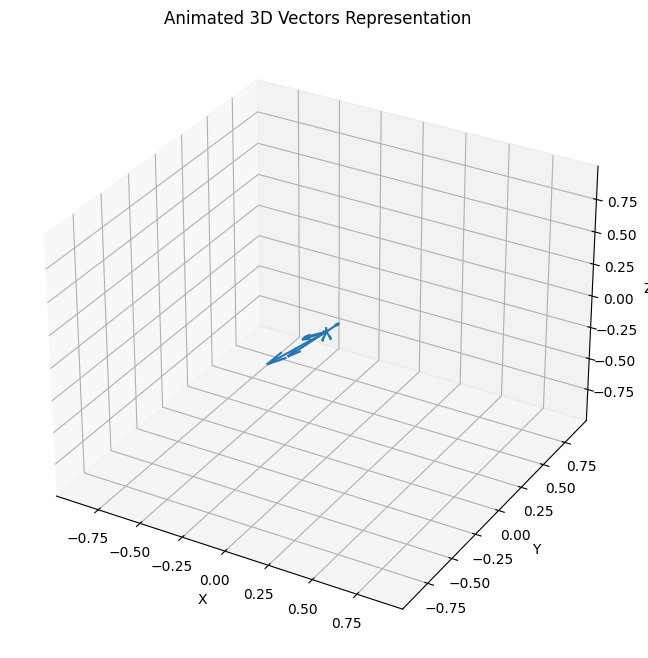

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
# Normalize the data
for col_group in grouped.columns.levels[0]:
    magnitude = (grouped[col_group, 'PD']**2 + 
                    grouped[col_group, 'PE']**2 + 
                    grouped[col_group, 'PN']**2)**0.5
    max_magnitude = magnitude.max()
    grouped[col_group, 'PD'] /= max_magnitude
    grouped[col_group, 'PE'] /= max_magnitude
    grouped[col_group, 'PN'] /= max_magnitude

# Get the maximum and minimum values for setting the axis limits
max_val = grouped.max().max()
min_val = grouped.min().min()

# Set up the animated plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Animated 3D Vectors Representation')

# Set the axis limits
ax.set_xlim([min_val, max_val])
ax.set_ylim([min_val, max_val])
ax.set_zlim([min_val, max_val])

quivers = [ax.quiver(0, 0, 0, 0, 0, 0, length=1, label=col_group) 
           for col_group in grouped.columns.levels[0]]

def update(num):
    for idx, col_group in enumerate(grouped.columns.levels[0]):
        quivers[idx].remove()
        quivers[idx] = ax.quiver(0, 0, 0, 
                                    grouped[col_group, 'PD'].iloc[num], 
                                    grouped[col_group, 'PE'].iloc[num], 
                                    grouped[col_group, 'PN'].iloc[num], 
                                    length=1)

ani = FuncAnimation(fig, update, frames=len(grouped), blit=False, repeat=True)
animations = [ani]

# To save the animation, uncomment the following line:
ani.save('animated_vectors.gif', writer='imagemagick', fps=fps)